In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040133.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  0.415686  0.415686  0.419608  0.419608  0.423529  0.423529  0.423529   

          7         8         9  ...      4192      4193      4194      4195  \
0  0.427451  0.423529  0.423529  ...  0.270588  0.270588  0.266667  0.262745   

       4196      4197      4198     4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.262745  0.262745  0.266667  0.27451    113.117647      61.882353  

[1 rows x 4202 columns]
[113.11764706]  /  [61.88235294]
          0         1         2         3         4         5         6  \
0  0.415686  0.415686  0.419608  0.419608  0.423529  0.423529  0.423529   

          7         8         9  ...      4190      4191      4192      4193  \
0  0.427451  0.423529  0.423529  ...  0.282353  0.278431  0.270588  0.270588   

       4194      4195      4196      4197      4198     4199  
0  0.266667  0.262745  0.262745  0.262745  0.266667  0.27451  

[1 rows x 4200 columns]


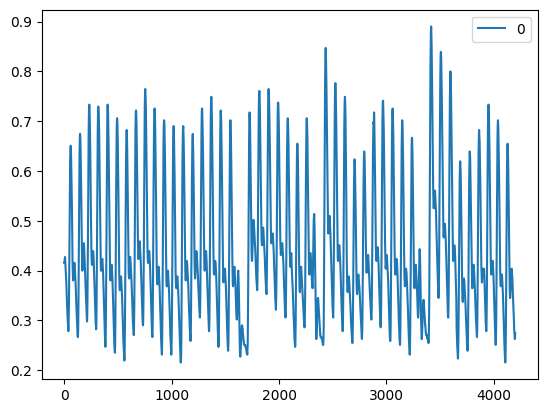

In [185]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [186]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

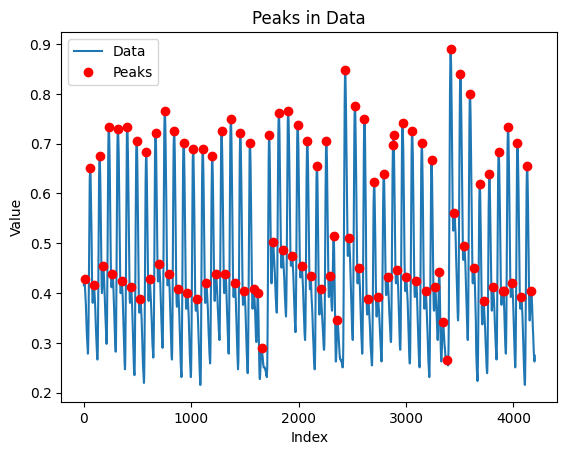

{'indices': array([   7,   59,   94,  147,  181,  233,  267,  317,  353,  404,  440,
        492,  527,  581,  613,  668,  701,  754,  789,  841,  877,  929,
        965, 1018, 1052, 1107, 1141, 1196, 1230, 1283, 1319, 1369, 1405,
       1457, 1494, 1547, 1583, 1619, 1655, 1725, 1761, 1816, 1851, 1903,
       1939, 1991, 2028, 2081, 2113, 2170, 2205, 2258, 2293, 2326, 2362,
       2434, 2470, 2524, 2561, 2613, 2649, 2703, 2738, 2793, 2828, 2881,
       2885, 2917, 2968, 3003, 3057, 3095, 3147, 3182, 3238, 3272, 3309,
       3346, 3385, 3416, 3451, 3507, 3543, 3596, 3632, 3687, 3722, 3776,
       3811, 3863, 3900, 3909, 3950, 3987, 4038, 4074, 4128, 4166]), 'values': array([0.42745098, 0.65098039, 0.41568627, 0.6745098 , 0.45490196,
       0.73333333, 0.43921569, 0.72941176, 0.42352941, 0.73333333,
       0.41176471, 0.70588235, 0.38823529, 0.68235294, 0.42745098,
       0.72156863, 0.45882353, 0.76470588, 0.43921569, 0.7254902 ,
       0.40784314, 0.70196078, 0.4       , 0.69019608, 0.

In [187]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [188]:
def split_values_high_low(filtered_df, threshold=0.6):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[None, 0.6509803921568628, None, 0.6745098039215687, None, 0.7333333333333333, None, 0.7294117647058823, None, 0.7333333333333333, None, 0.7058823529411765, None, 0.6823529411764706, None, 0.7215686274509804, None, 0.7647058823529411, None, 0.7254901960784313, None, 0.7019607843137254, None, 0.6901960784313725, None, 0.6901960784313725, None, 0.6745098039215687, None, 0.7254901960784313, None, 0.7490196078431373, None, 0.7215686274509804, None, 0.7019607843137254, None, None, None, 0.7176470588235294, None, 0.7607843137254902, None, 0.7647058823529411, None, 0.7372549019607844, None, 0.7058823529411765, None, 0.6549019607843137, None, 0.7058823529411765, None, None, None, 0.8470588235294118, None, 0.7764705882352941, None, 0.7490196078431373, None, 0.6235294117647059, None, 0.6392156862745098, None, 0.6980392156862745, 0.7176470588235294, None, 0.7411764705882353, None, 0.7254901960784313, None, 0.7019607843137254, None, 0.6666666666666666, None, None, None, None, 0.8901960784313725, N

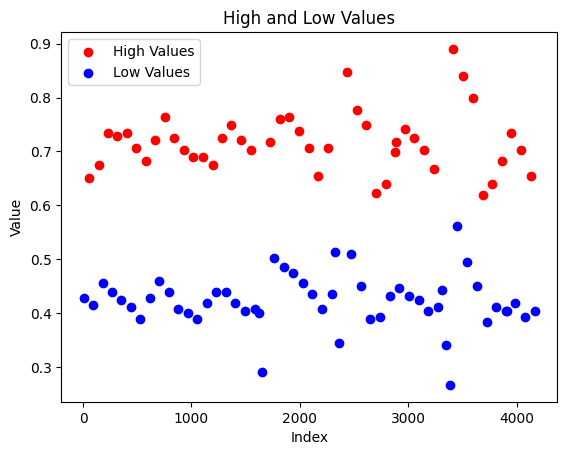

In [189]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [190]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.717124183006536
Average Low Value: 0.4230854605993339
